# Import statements

In [18]:
from dwt import dwt_2d, idwt_2d
from dct import dct_2d, idct_2d, apply_2d_dct_all_blocks
from watermark_encryption import get_watermark_img, keygen, generate_2d_key, encrypt_watermark, decrypt_watermark
from helpers import reshape_2d_data_with_padding, create_non_overlapping_blocks
import numpy as np
from numpy import r_
from numpy import pi
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.cm as cm

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

# Read the image

In [2]:
img = Image.open("../assets/zelda.tif") # open colour image

In [91]:

img = img.convert('1') # convert image to black and white

In [3]:
img = np.asarray(img)
print("Image shape: ", img.shape)

Image shape:  (512, 512)


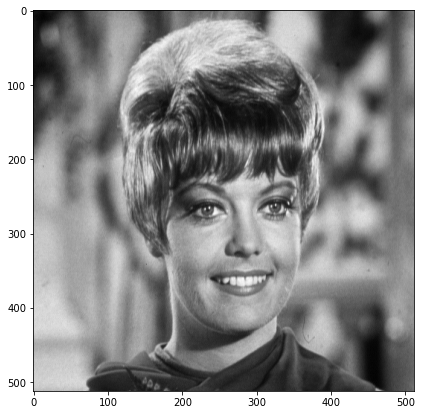

In [4]:
f = plt.figure()
plt.imshow(img,cmap='gray')

# Apply 2D_DWT

In [5]:
coeffs = dwt_2d(img, 'haar')
LL, (LH, HL, HH) = coeffs

print("LL coefficient shape: ", LL.shape)

LL coefficient shape:  (256, 256)


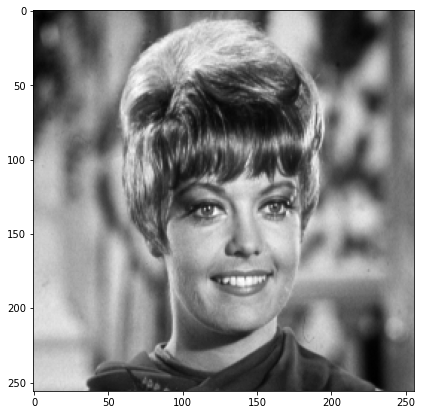

In [6]:
f = plt.figure()
plt.imshow(LL,cmap='gray')

# Apply 2D_DCT

In [7]:
non_overlapping_blocks = create_non_overlapping_blocks(LL, (8, 8))
dct_blocks = apply_2d_dct_all_blocks(non_overlapping_blocks)

print("Size of Non overlapping blocks", non_overlapping_blocks.shape)
print("Size of Non overlapping DCT blocks", dct_blocks.shape)

Size of Non overlapping blocks (32, 32, 8, 8)
Size of Non overlapping DCT blocks (32, 32, 8, 8)


## Plot the pictures

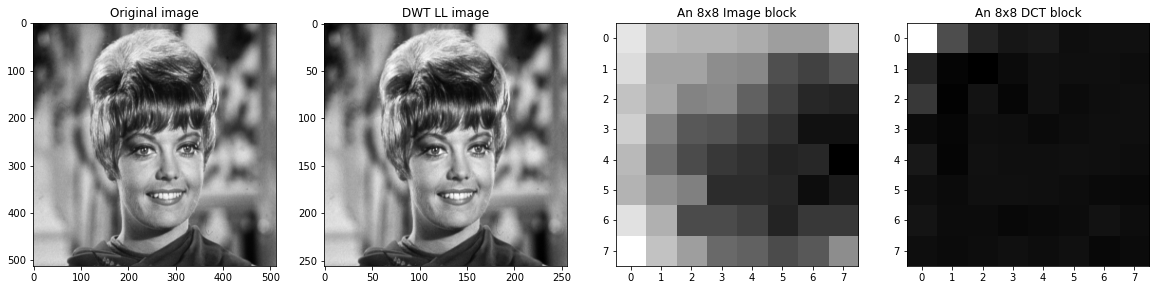

In [9]:
random_block_x, random_block_y = (0, 0)
plt.figure(figsize=(20, 5))

# Plot original image
ax = plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title( "Original image")
plt.gray()

# Plot LL of DWT-2D
ax = plt.subplot(1, 4, 2)
plt.imshow(LL)
plt.title( "DWT LL image")
plt.gray()

# Extract a block from image
ax = plt.subplot(1, 4, 3)
plt.imshow(non_overlapping_blocks[random_block_x][random_block_y])
plt.title( "An 8x8 Image block")
plt.gray()

# Display the dct of that block
ax = plt.subplot(1, 4, 4)
plt.imshow(dct_blocks[random_block_x][random_block_y])
plt.title( "An 8x8 DCT block")
plt.gray()

plt.show()

# Read Image as binary image

In [10]:
watermark_img = get_watermark_img()

In [17]:
plt.imsave('../assets/watermark_32_32.jpeg', watermark_img, cmap=cm.gray)

In [11]:
enc_key = generate_2d_key(32, 32)

In [12]:
wat_enc = encrypt_watermark(watermark_img, enc_key)

In [13]:
original_watermark = decrypt_watermark(wat_enc, enc_key)

## Plot the watermark pictures

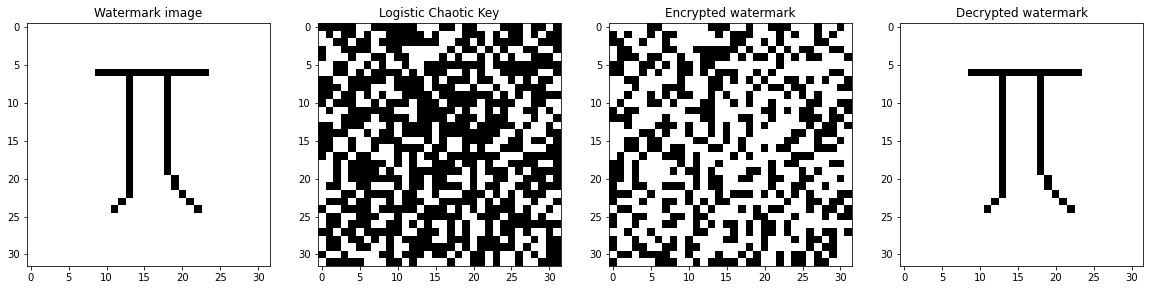

In [14]:
plt.figure(figsize=(20, 5))

# Plot original watermark image
ax = plt.subplot(1, 4, 1)
plt.imshow(watermark_img)
plt.title( "Watermark image")
plt.gray()

# Plot encrypted watermark image
ax = plt.subplot(1, 4, 2)
plt.imshow(enc_key)
plt.title( "Logistic Chaotic Key")
plt.gray()

# Plot encrypted watermark image
ax = plt.subplot(1, 4, 3)
plt.imshow(wat_enc)
plt.title( "Encrypted watermark")
plt.gray()

# Plot encrypted watermark image
ax = plt.subplot(1, 4, 4)
plt.imshow(original_watermark)
plt.title( "Decrypted watermark")
plt.gray()

plt.show()